### __Iris Flower Classification__

##### __1. Importing Libraries__

In [37]:
import numpy as np
import pandas as pd 
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

#### __2. Importing Dataset__

In [4]:
df = pd.read_csv("iris.data")

##### _2.1 Exploring The Dataset_

In [5]:
df.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [6]:
df.tail()

,5.1,3.5,1.4,0.2,Iris-setosa
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica
148,5.9,3.0,5.1,1.8,Iris-virginica


In [8]:
df.shape

(149, 5)

In [9]:
df.isnull().sum()

5.1            0
3.5            0
1.4            0
0.2            0
Iris-setosa    0
dtype: int64

In [10]:
df.dtypes

5.1            float64
3.5            float64
1.4            float64
0.2            float64
Iris-setosa     object
dtype: object

In [14]:
data = df.groupby('Iris-setosa')

In [15]:
data.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
49,7.0,3.2,4.7,1.4,Iris-versicolor
50,6.4,3.2,4.5,1.5,Iris-versicolor
51,6.9,3.1,4.9,1.5,Iris-versicolor
52,5.5,2.3,4.0,1.3,Iris-versicolor
53,6.5,2.8,4.6,1.5,Iris-versicolor


##### _2.2 Formating The Dataset Appropriately_

In [18]:
df = df.rename(columns={
    "5.1" : "SepalLengthCm",
    "3.5" : "SepalWidthCm",
    "1.4" : "PetalLengthCm",
    "0.2" : "PetalWidthCm",
    "Iris-setosa" : "Species",
})

In [20]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [21]:
data = df.groupby("Species")

In [22]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
49,7.0,3.2,4.7,1.4,Iris-versicolor
50,6.4,3.2,4.5,1.5,Iris-versicolor
51,6.9,3.1,4.9,1.5,Iris-versicolor
52,5.5,2.3,4.0,1.3,Iris-versicolor
53,6.5,2.8,4.6,1.5,Iris-versicolor


In [23]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  149 non-null    float64
 1   SepalWidthCm   149 non-null    float64
 2   PetalLengthCm  149 non-null    float64
 3   PetalWidthCm   149 non-null    float64
 4   Species        149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


##### _2.3 Visualizing The Dataset_

{'whiskers': [<matplotlib.lines.Line2D at 0x114c0e88bd0>,
 'caps': [<matplotlib.lines.Line2D at 0x114c0e89f90>,
 'boxes': [<matplotlib.lines.Line2D at 0x114beb20490>],
 'medians': [<matplotlib.lines.Line2D at 0x114c0e8b0d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x114bc8751d0>],
 'means': []}

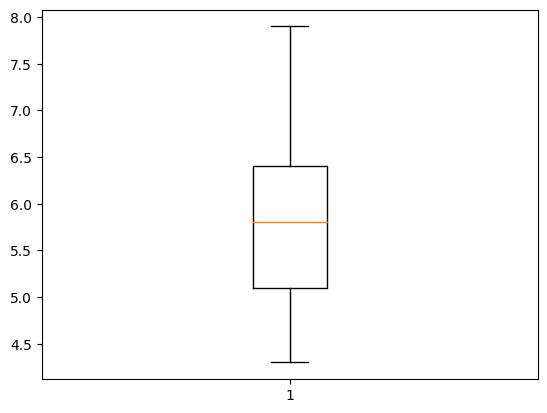

In [28]:
plt.boxplot(df['SepalLengthCm'])

{'whiskers': [<matplotlib.lines.Line2D at 0x114c0ef5c10>,
 'caps': [<matplotlib.lines.Line2D at 0x114c0ef7250>,
 'boxes': [<matplotlib.lines.Line2D at 0x114c0e89050>],
 'medians': [<matplotlib.lines.Line2D at 0x114c0f00550>],
 'fliers': [<matplotlib.lines.Line2D at 0x114c0e49110>],
 'means': []}

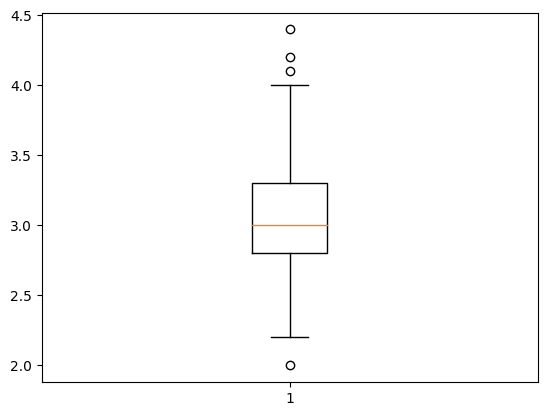

In [29]:
plt.boxplot(df['SepalWidthCm'])

{'whiskers': [<matplotlib.lines.Line2D at 0x114c1937310>,
 'caps': [<matplotlib.lines.Line2D at 0x114c1948390>,
 'boxes': [<matplotlib.lines.Line2D at 0x114c1936790>],
 'medians': [<matplotlib.lines.Line2D at 0x114c19497d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x114c1889e10>],
 'means': []}

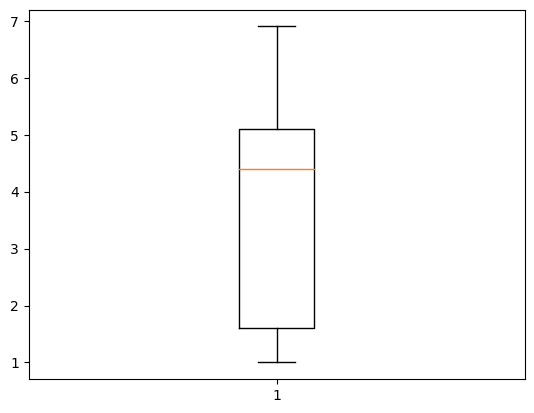

In [32]:
plt.boxplot(df['PetalLengthCm'])

{'whiskers': [<matplotlib.lines.Line2D at 0x114c19a9f90>,
 'caps': [<matplotlib.lines.Line2D at 0x114c19ab310>,
 'boxes': [<matplotlib.lines.Line2D at 0x114c199a010>],
 'medians': [<matplotlib.lines.Line2D at 0x114c19b44d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x114c19a9e90>],
 'means': []}

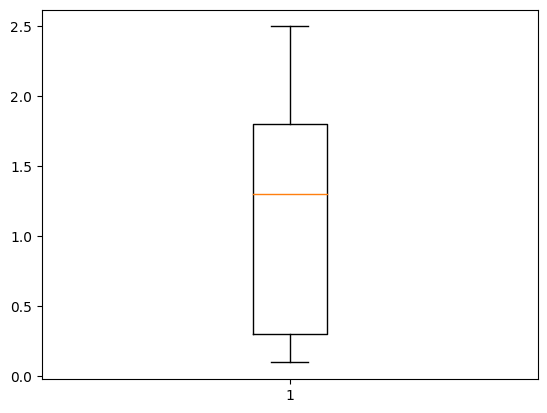

In [33]:
plt.boxplot(df['PetalWidthCm'])


#### __3. Data Preparation__

In [40]:
label_encoder = LabelEncoder()
df['Species_Encoded'] = label_encoder.fit_transform(df['Species'])


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_Encoded
0,4.9,3.0,1.4,0.2,Iris-setosa,0
1,4.7,3.2,1.3,0.2,Iris-setosa,0
2,4.6,3.1,1.5,0.2,Iris-setosa,0
3,5.0,3.6,1.4,0.2,Iris-setosa,0
4,5.4,3.9,1.7,0.4,Iris-setosa,0


In [53]:
df.drop('Species', axis = 1, inplace = True)


KeyError: "['Species'] not found in axis"

In [54]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Encoded
0,4.9,3.0,1.4,0.2,0
1,4.7,3.2,1.3,0.2,0
2,4.6,3.1,1.5,0.2,0
3,5.0,3.6,1.4,0.2,0
4,5.4,3.9,1.7,0.4,0


<Axes: >

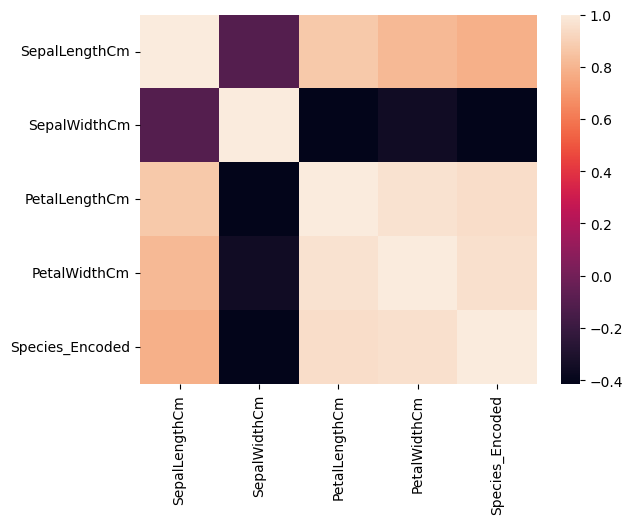

In [49]:
sns.heatmap(df.corr())

##### _3.1 Finding Dependant & Independant Variables_

In [57]:
X = df.iloc[:,0:4]
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,4.9,3.0,1.4,0.2
1,4.7,3.2,1.3,0.2
2,4.6,3.1,1.5,0.2
3,5.0,3.6,1.4,0.2
4,5.4,3.9,1.7,0.4
...,...,...,...,...
144,6.7,3.0,5.2,2.3
145,6.3,2.5,5.0,1.9
146,6.5,3.0,5.2,2.0
147,6.2,3.4,5.4,2.3


In [59]:
Y = df.iloc[:,4]
Y

0      0
1      0
2      0
3      0
4      0
      ..
144    2
145    2
146    2
147    2
148    2
Name: Species_Encoded, Length: 149, dtype: int32

In [60]:
X_train , X_test, Y_train , Y_test = train_test_split(X,Y,test_size = 0.33, random_state = 42)

#### __4. Training Model__

In [61]:
model = LinearRegression()

In [63]:
model.fit(X,Y)

LinearRegression()

In [79]:
print("The Score of the model = ", model.score(X,Y)*100,"%")


The Score of the model =  92.97853053271953 %


In [76]:
print("The Co-efficient value of the model = ", model.coef_)

The Co-efficient value of the model =  [-0.11021076 -0.04472723  0.22746691  0.61014756]


In [75]:
print("The intercept value of the model = " , model.intercept_)

The intercept value of the model =  0.19369639403228567


#### __5. Making Predictions__

In [70]:
Y_pred = model.predict(X_test)

#### __6. Model Evolution__

In [74]:
print("The Mean Squared Error: %.2f%%" % np.mean((Y_pred - Y_test)**2))

The Mean Squared Error: 0.06%


<code> The model achieved an impressive Mean Squared Error of 0.06% </code>